In [214]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [215]:
df = pd.read_csv('garments_worker_productivity.csv')
print(df)

           date   quarter  department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1      sweing   Thursday     8                   0.80   
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday     6                   0.80   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.70   

        smv     wip  over_t

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [217]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [218]:
df.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [219]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


outliers in max actual productivity

In [220]:
df.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


**Exploratory Data Analysis**

In [221]:
df['team'] = df['team'].apply(lambda x:str(x)) # Making team number an object type
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

In [222]:
for c in category.columns:
    print(f"{c}")
    print(category[c].unique())
    print()

date
['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

department
['sweing' 'finishing ' 'finishing']

day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

team
['8' '1' '11' '12' '6' '7' '2' '3' '9' '10' '5' '4']



In [223]:
df.department.value_counts() # needs to be fixed

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [224]:
category.loc[:,'department'] = category.loc[:,'department'].str.strip() # removing error in 'finishing'
category['department']=category['department'].replace(['sweing'],['sewing']) # fixing the error in the name

In [225]:
category.department.value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

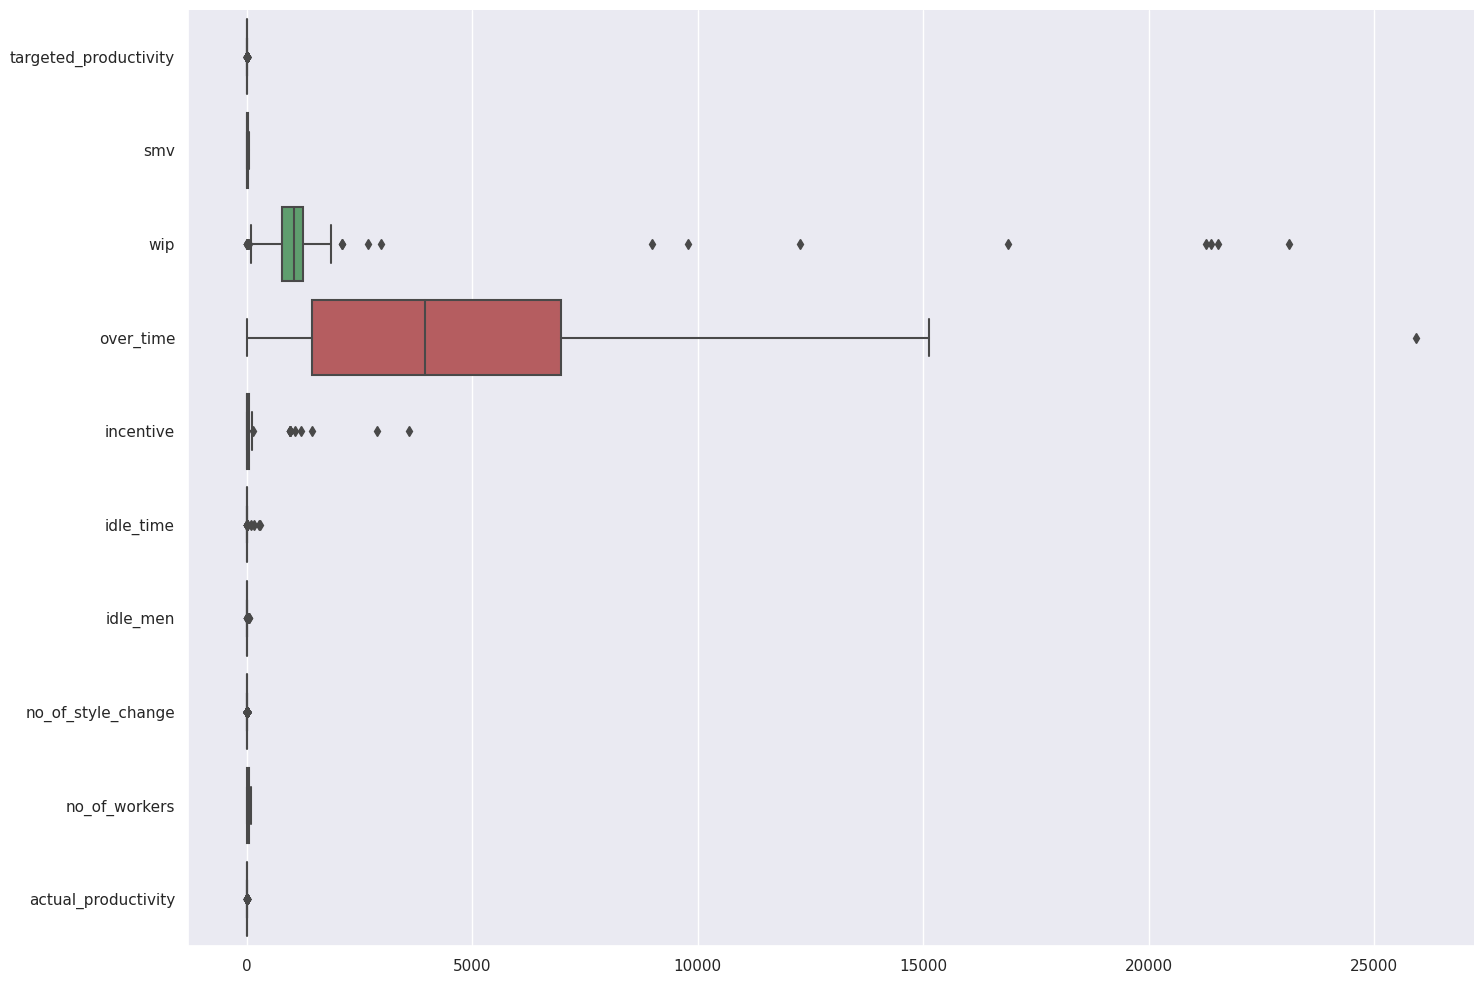

In [226]:
sns.catplot(kind='box', data=numerical, orient='h', height=10, aspect=1.5)

<Axes: >

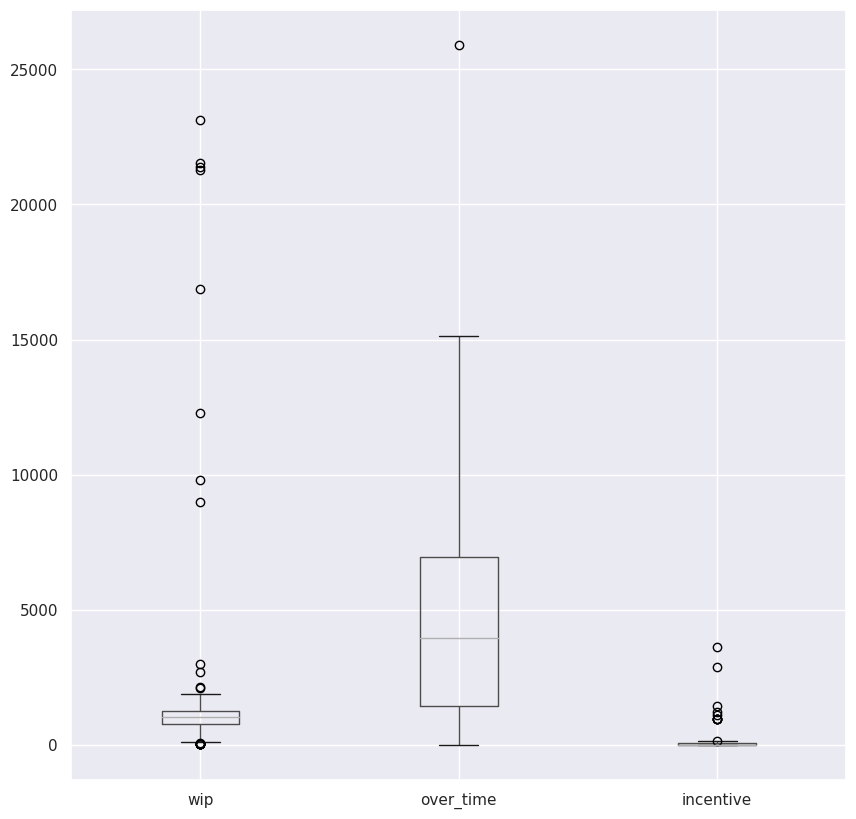

In [227]:
numerical.boxplot(column=['wip', 'over_time', 'incentive'],figsize=(10,10))

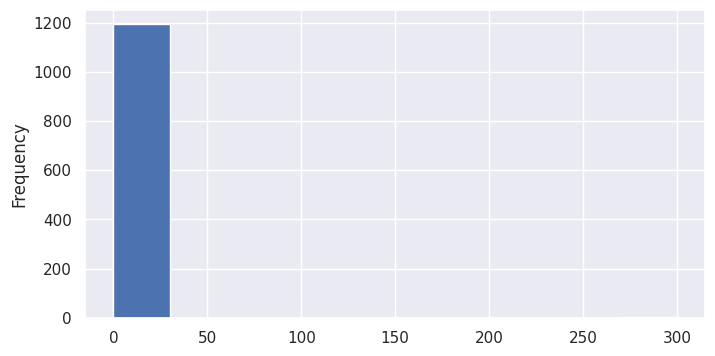

In [228]:
numerical['idle_time'].plot(kind='hist')
plt.show()

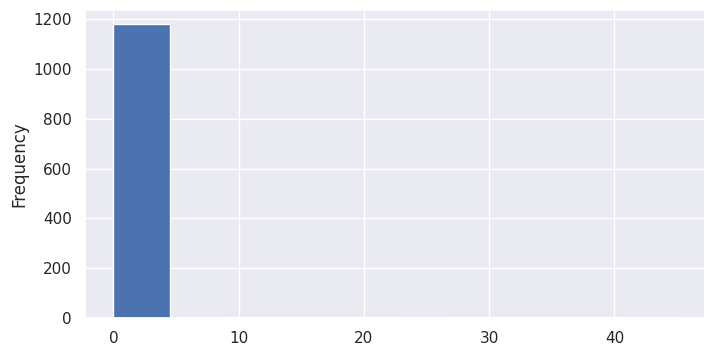

In [229]:
numerical['idle_men'].plot(kind='hist')
plt.show()

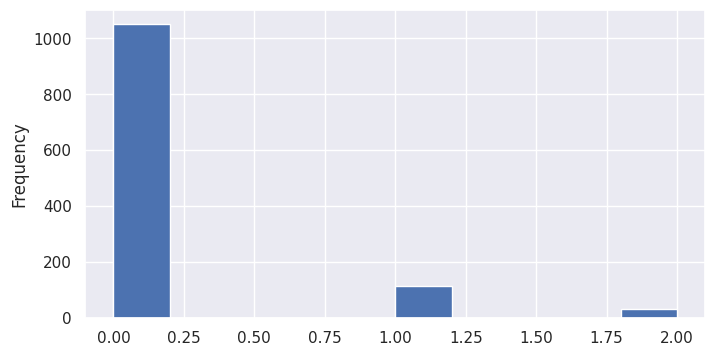

In [230]:
numerical['no_of_style_change'].plot(kind='hist')
plt.show()

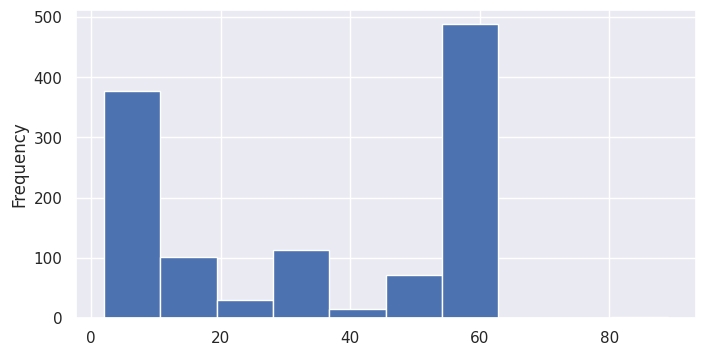

In [231]:
numerical['no_of_workers'].plot(kind='hist')
plt.show()

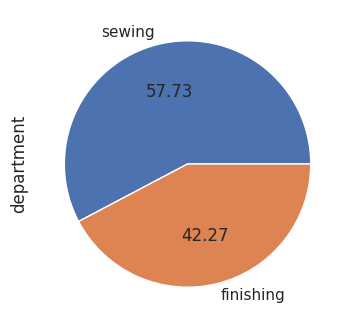

In [232]:
category['department'].value_counts().plot(kind='pie', autopct="%.2f")
plt.show()

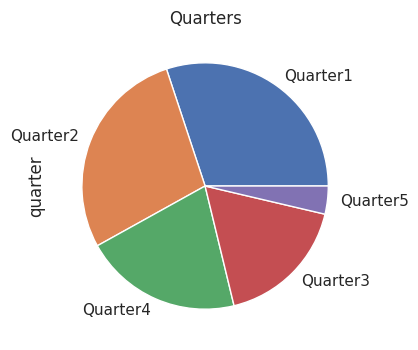

In [233]:
plt.title("Quarters")
category['quarter'].value_counts().plot(kind='pie')
plt.show()

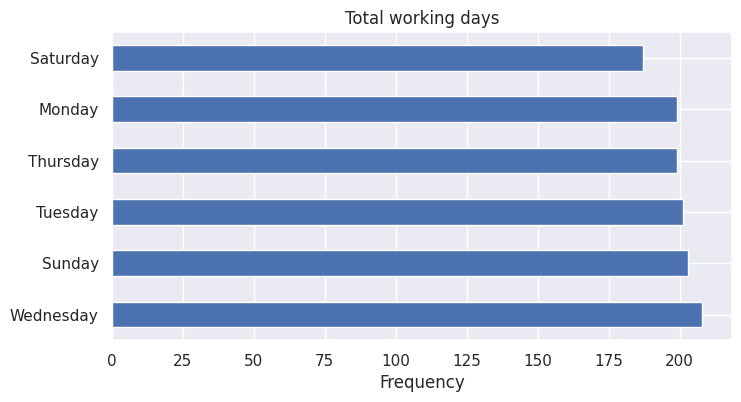

In [234]:
category['day'].value_counts().plot(kind='barh')
plt.title("Total working days")
plt.xlabel('Frequency')
plt.show()

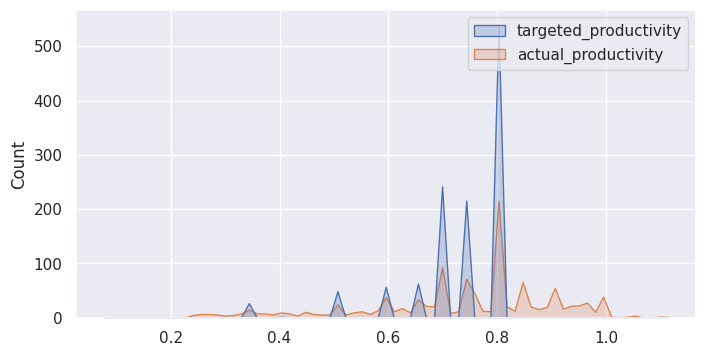

In [235]:
sns.histplot(data=numerical[['targeted_productivity', 'actual_productivity']], element='poly')
plt.show()

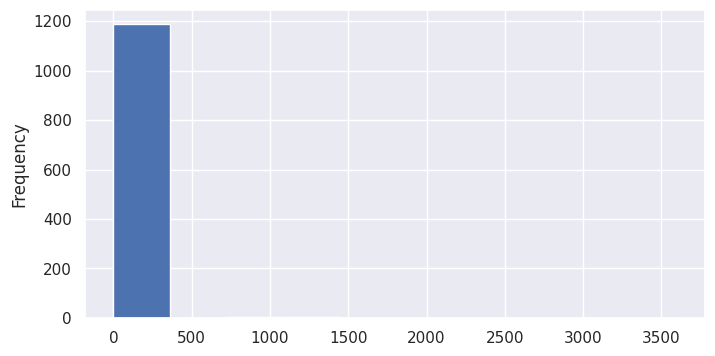

In [236]:
numerical['incentive'].plot(kind='hist')
plt.show()

In [237]:
numerical.isna().sum()

targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [238]:
numerical[numerical.isnull().any(axis=1)] # these entries all have NAs

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...
1192,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [239]:
# Reassemble the df
df2 = pd.concat([category, numerical], axis=1)

In [240]:
df2[df2.isnull().any(axis=1)]['department'].unique() # when we have NaN values, it always labeled as 'finishing'

array(['finishing'], dtype=object)

In [241]:
df2['wip'] = df2['wip'].fillna(value=0.0) # We then fill NaNs with a float64 version of 0, to fix them
numerical['wip'] = numerical['wip'].fillna(value=0.0)

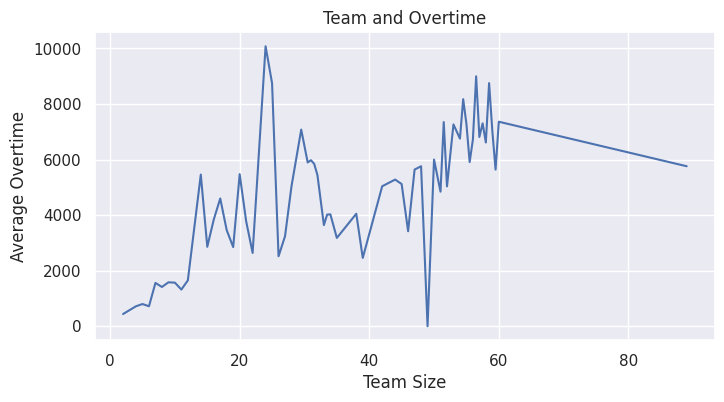

In [242]:
x_axis = df2['no_of_workers'].unique()
y_axis=[]
for val in x_axis:
    y_axis.append(df2['over_time'][df2['no_of_workers'] == val].mean())

sns.lineplot(x=x_axis, y=y_axis)
plt.title("Team and Overtime")
plt.xlabel('Team Size')
plt.ylabel('Average Overtime')
plt.show()

**Feature Selection**

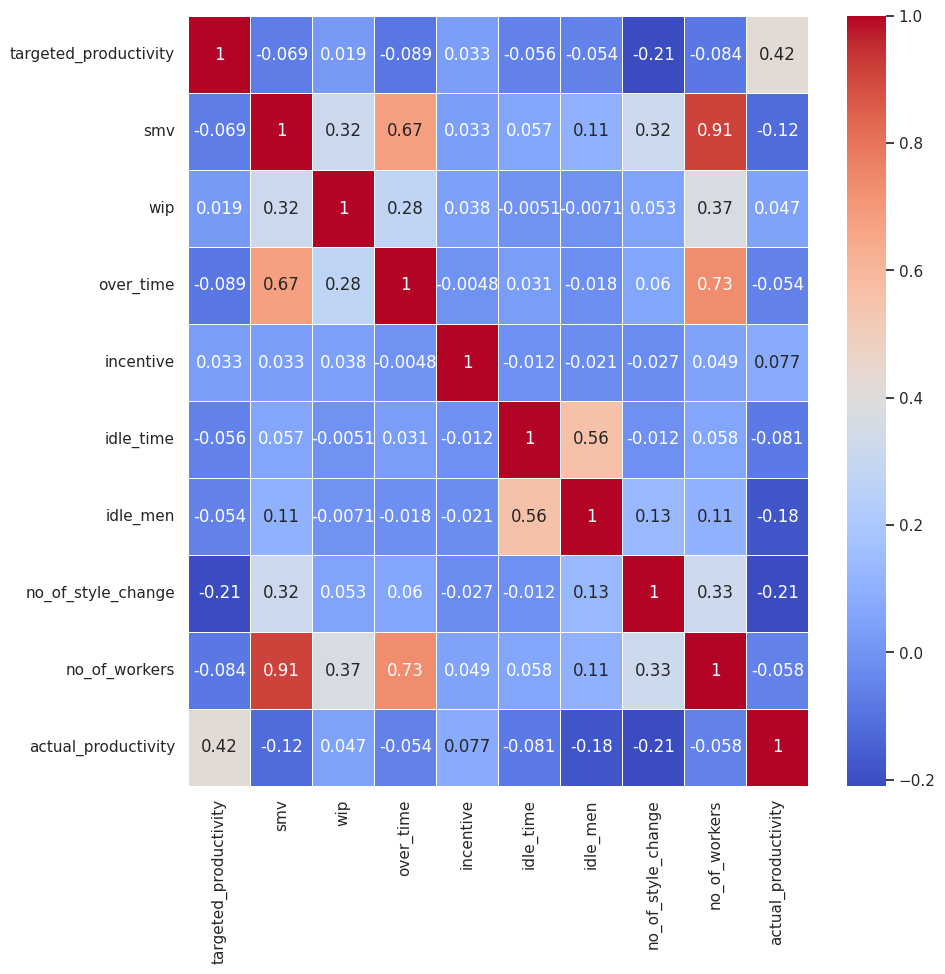

In [243]:
corrMatrix = numerical.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")
plt.show()

no_of_workers & smv are collinear and have a high correlation coefficient between themselves

In [244]:
df2.drop(columns='date', inplace=True)
df2 = pd.get_dummies(df2,drop_first=True, columns=['day', 'department', 'quarter','team'])

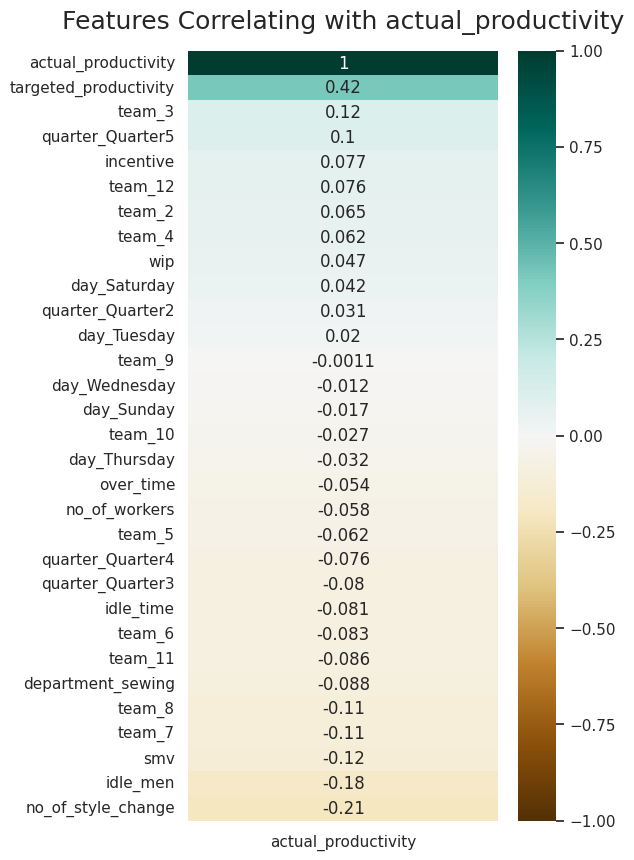

In [245]:
corrMatrix = df2.corr()

plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with actual_productivity', fontdict={'fontsize':18}, pad=16);

In [246]:
actual_productivity_corr = pd.DataFrame(corrMatrix[['actual_productivity']])
significant = actual_productivity_corr[abs(actual_productivity_corr) >= 0.05]
significant['Use'] = significant['actual_productivity'].notna()
non_significant = significant[ significant['Use'] == False]
significant_col = significant.index[significant['Use']].tolist()
non_significant_col = non_significant.index[non_significant['Use'] == False].tolist()
significant_col.remove('actual_productivity')
non_significant_col.append('no_of_workers') # Due to coliniearity between smv and no_of_workers
non_significant_col.append('department_sewing') # Collinear with smv
#non_significant_col.append('department_finishing') # Collinear with department_finishing
non_significant_col.append('idle_time') # Due to high frequency of 0 values
non_significant_col.append('idle_men') # Due to high frequency of 0 values
df2.drop(columns=non_significant_col, inplace=True)
X = np.array(df2.drop(columns='actual_productivity'))

In [247]:
non_significant_col

['wip',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday',
 'quarter_Quarter2',
 'team_10',
 'team_9',
 'no_of_workers',
 'department_sewing',
 'idle_time',
 'idle_men']

Elbow Method (KMeans)

In [248]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA

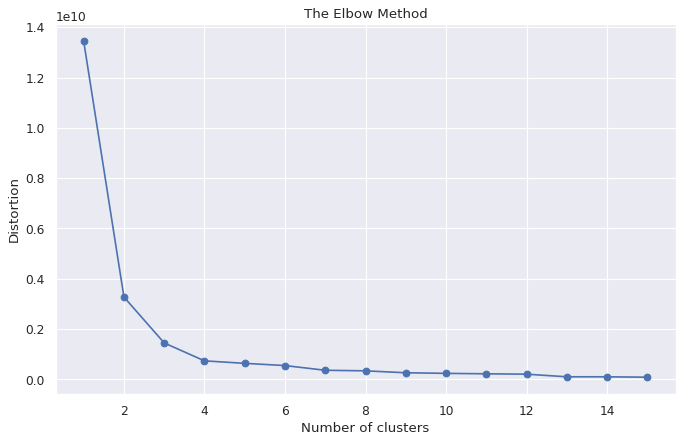

In [249]:
# calculate distortion for a range of number of cluster
#to determine the optimal number of clusters to use based on the elbow method.
distortions = []
figure(figsize=(10, 6), dpi=80)

for i in range(1, 16):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 16), distortions, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [250]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X) # By using an Elbow Method for K-means clustering we find the optimal number of clusters to be = 4

In [251]:
df2['cluster'] = kmeans.labels_
X = df2.drop(columns='actual_productivity') # X to be used with the model

Principal Component Analysis

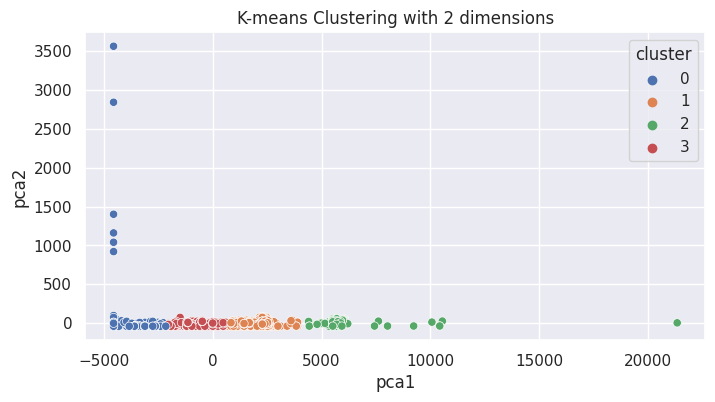

In [252]:
# Run PCA on the data and reduce the dimensions in pca_num_components dimensions
# visualizing the results of K-means clustering after reducing the dimensionality of the dataset using PCA, which can help to identify patterns and relationships between the data points and clusters.
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
centroids = np.array(kmeans.cluster_centers_)
sns.set(rc={"figure.figsize":(8, 4)})
sns.scatterplot(x="pca1", y="pca2", hue=X['cluster'], data=results, palette="deep")
plt.title('K-means Clustering with 2 dimensions')
plt.show()

**Building Prediction Models**

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [254]:
X0 = df2[df2['cluster'] == 0 ].drop(columns='actual_productivity')
y0 = df2[df2['cluster'] == 0 ].actual_productivity
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.15, random_state= 0)

X1 = df2[df2['cluster'] == 1 ].drop(columns='actual_productivity')
y1 = df2[df2['cluster'] == 1 ].actual_productivity
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15, random_state= 0)

X2 = df2[df2['cluster'] == 2 ].drop(columns='actual_productivity')
y2 = df2[df2['cluster'] == 2 ].actual_productivity
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.15, random_state= 0)


X3 = df2[df2['cluster'] == 3 ].drop(columns='actual_productivity')
y3 = df2[df2['cluster'] == 3 ].actual_productivity
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.15, random_state= 0)

In [255]:
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []

1. Linear Regression

In [256]:
# Cluster #0
lin_reg = LinearRegression()
lin_reg.fit(X0_train,y0_train)
#Prediction using test set
y0_pred = lin_reg.predict(X0_test)
mae=metrics.mean_absolute_error(y0_test, y0_pred)
mse=metrics.mean_squared_error(y0_test, y0_pred)
# Printing the metrics
print('Linear Regression for Cluster #0:')
print('R2 square:',metrics.r2_score(y0_test, y0_pred))
cluster0.append(metrics.r2_score(y0_test, y0_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #1
lin_reg = LinearRegression()
lin_reg.fit(X1_train,y1_train)
#Prediction using test set
y1_pred = lin_reg.predict(X1_test)
mae=metrics.mean_absolute_error(y1_test, y1_pred)
mse=metrics.mean_squared_error(y1_test, y1_pred)
# Printing the metrics
print('Linear Regression for Cluster #1:')
print('R2 square:',metrics.r2_score(y1_test, y1_pred))
cluster1.append(metrics.r2_score(y1_test, y1_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #2
lin_reg = LinearRegression()
lin_reg.fit(X2_train,y2_train)
#Prediction using test set
y2_pred = lin_reg.predict(X2_test)
mae=metrics.mean_absolute_error(y2_test, y2_pred)
mse=metrics.mean_squared_error(y2_test, y2_pred)
# Printing the metrics
print('Linear Regression for Cluster #2:')
print('R2 square:',metrics.r2_score(y2_test, y2_pred))
cluster2.append(metrics.r2_score(y2_test, y2_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #3
lin_reg = LinearRegression()
lin_reg.fit(X3_train,y3_train)
#Prediction using test set
y3_pred = lin_reg.predict(X3_test)
mae=metrics.mean_absolute_error(y3_test, y3_pred)
mse=metrics.mean_squared_error(y3_test, y3_pred)
# Printing the metrics
print('Linear Regression for Cluster #3:')
print('R2 square:',metrics.r2_score(y3_test, y3_pred))
cluster3.append(metrics.r2_score(y3_test, y3_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

Linear Regression for Cluster #0:
R2 square: -0.05109049115183506
MAE:  0.14118468741088894
MSE:  0.032176437969241224

Linear Regression for Cluster #1:
R2 square: 0.7310274580528049
MAE:  0.06695440332121397
MSE:  0.008132878487978785

Linear Regression for Cluster #2:
R2 square: 0.7983094903361239
MAE:  0.02825078259191311
MSE:  0.0018082450560791788

Linear Regression for Cluster #3:
R2 square: 0.3893159098988549
MAE:  0.11982502560683102
MSE:  0.025949613992241504



2. Lasso Regression

In [257]:
# Cluster #0
las_reg = Lasso()
las_reg.fit(X0_train, y0_train)
#Prediction using test set
y0_pred = las_reg.predict(X0_test)
mae=metrics.mean_absolute_error(y0_test, y0_pred)
mse=metrics.mean_squared_error(y0_test, y0_pred)
# Printing the metrics
print('Lasso Regression for Cluster #0:')
print('R2 square:',metrics.r2_score(y0_test, y0_pred))
cluster0.append(metrics.r2_score(y0_test, y0_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #1
las_reg = Lasso()
las_reg.fit(X1_train, y1_train)
#Prediction using test set
y1_pred = las_reg.predict(X1_test)
mae=metrics.mean_absolute_error(y1_test, y1_pred)
mse=metrics.mean_squared_error(y1_test, y1_pred)
# Printing the metrics
print('Lasso Regression for Cluster #1:')
print('R2 square:',metrics.r2_score(y1_test, y1_pred))
cluster1.append(metrics.r2_score(y1_test, y1_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #2
las_reg = Lasso()
las_reg.fit(X2_train, y2_train)
#Prediction using test set
y2_pred = las_reg.predict(X2_test)
mae=metrics.mean_absolute_error(y2_test, y2_pred)
mse=metrics.mean_squared_error(y2_test, y2_pred)
# Printing the metrics
print('Lasso Regression for Cluster #2:')
print('R2 square:',metrics.r2_score(y2_test, y2_pred))
cluster2.append(metrics.r2_score(y2_test, y2_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #3
las_reg = Lasso()
las_reg.fit(X3_train, y3_train)
#Prediction using test set
y3_pred = las_reg.predict(X3_test)
mae=metrics.mean_absolute_error(y3_test, y3_pred)
mse=metrics.mean_squared_error(y3_test, y3_pred)
# Printing the metrics
print('Lasso Regression for Cluster #3:')
print('R2 square:',metrics.r2_score(y3_test, y3_pred))
cluster3.append(metrics.r2_score(y3_test, y3_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')


Lasso Regression for Cluster #0:
R2 square: -0.004539965604514862
MAE:  0.14585206760156383
MSE:  0.030751413092393997

Lasso Regression for Cluster #1:
R2 square: 0.3435042798407272
MAE:  0.09977857567131937
MSE:  0.019850353055672447

Lasso Regression for Cluster #2:
R2 square: 0.1297892133690759
MAE:  0.06619640919116886
MSE:  0.0078018264483268015

Lasso Regression for Cluster #3:
R2 square: 0.00797708978362932
MAE:  0.16159198261394167
MSE:  0.042153728922774504



3. Ridge Regression

In [258]:
# Cluster #0
rid_reg = Ridge()
rid_reg.fit(X0_train, y0_train)
#Prediction using test set
y0_pred = rid_reg.predict(X0_test)
mae=metrics.mean_absolute_error(y0_test, y0_pred)
mse=metrics.mean_squared_error(y0_test, y0_pred)
# Printing the metrics
print('Ridge Regression for Cluster #0:')
print('R2 square:',metrics.r2_score(y0_test, y0_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #1
rid_reg = Ridge()
rid_reg.fit(X1_train, y1_train)
#Prediction using test set
y1_pred = rid_reg.predict(X1_test)
mae=metrics.mean_absolute_error(y1_test, y1_pred)
mse=metrics.mean_squared_error(y1_test, y1_pred)
# Printing the metrics
print('Ridge Regression for Cluster #1:')
print('R2 square:',metrics.r2_score(y1_test, y1_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #2
rid_reg = Ridge()
rid_reg.fit(X2_train, y2_train)
#Prediction using test set
y2_pred = rid_reg.predict(X2_test)
mae=metrics.mean_absolute_error(y2_test, y2_pred)
mse=metrics.mean_squared_error(y2_test, y2_pred)
# Printing the metrics
print('Ridge Regression for Cluster #2:')
print('R2 square:',metrics.r2_score(y2_test, y2_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #3
rid_reg = Ridge()
rid_reg.fit(X3_train, y3_train)
#Prediction using test set
y3_pred = rid_reg.predict(X3_test)
mae=metrics.mean_absolute_error(y3_test, y3_pred)
mse=metrics.mean_squared_error(y3_test, y3_pred)
# Printing the metrics
print('Ridge Regression for Cluster #3:')
print('R2 square:',metrics.r2_score(y3_test, y3_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

Ridge Regression for Cluster #0:
R2 square: -0.04367908282440269
MAE:  0.13998410733614805
MSE:  0.03194955672322118

Ridge Regression for Cluster #1:
R2 square: 0.689050992232933
MAE:  0.07287289758137025
MSE:  0.00940211397720889

Ridge Regression for Cluster #2:
R2 square: 0.7196567494687665
MAE:  0.031143991319717245
MSE:  0.002513401833448107

Ridge Regression for Cluster #3:
R2 square: 0.36526348744278303
MAE:  0.12021368626303044
MSE:  0.02697166629134432



4. Decision Tree

In [259]:
# Cluster #0
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X0_train,y0_train)
#Predicting using test set
y0_pred = dt_regressor.predict(X0_test)
mae=metrics.mean_absolute_error(y0_test, y0_pred)
mse=metrics.mean_squared_error(y0_test, y0_pred)
# Printing the metrics
print('Decision Tree Regressor for Cluster #0:')
print('R2 square:',metrics.r2_score(y0_test, y0_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #1
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X1_train,y1_train)
#Predicting using test set
y1_pred = dt_regressor.predict(X1_test)
mae=metrics.mean_absolute_error(y1_test, y1_pred)
mse=metrics.mean_squared_error(y1_test, y1_pred)
# Printing the metrics
print('Decision Tree Regressor for Cluster #1:')
print('R2 square:',metrics.r2_score(y1_test, y1_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #2
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X2_train,y2_train)
#Predicting using test set
y2_pred = dt_regressor.predict(X2_test)
mae=metrics.mean_absolute_error(y2_test, y2_pred)
mse=metrics.mean_squared_error(y2_test, y2_pred)
# Printing the metrics
print('Decision Tree Regressor for Cluster #2:')
print('R2 square:',metrics.r2_score(y2_test, y2_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #3
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X3_train,y3_train)
#Predicting using test set
y3_pred = dt_regressor.predict(X3_test)
mae=metrics.mean_absolute_error(y3_test, y3_pred)
mse=metrics.mean_squared_error(y3_test, y3_pred)
# Printing the metrics
print('Decision Tree Regressor for Cluster #3:')
print('R2 square:',metrics.r2_score(y3_test, y3_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

Decision Tree Regressor for Cluster #0:
R2 square: -0.2217929327682575
MAE:  0.14675073937910796
MSE:  0.03740205514502766

Decision Tree Regressor for Cluster #1:
R2 square: 0.7045549305057586
MAE:  0.05456050463888889
MSE:  0.00893332394702518

Decision Tree Regressor for Cluster #2:
R2 square: 0.6818247196251643
MAE:  0.023543306932000015
MSE:  0.0028525827946154934

Decision Tree Regressor for Cluster #3:
R2 square: 0.5215118698976409
MAE:  0.08467910470967743
MSE:  0.02033225112180202



5. Random Forest

In [260]:
# Cluster #0
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X0_train,y0_train)
#Predicting the SalePrices using test set
y0_pred = rf_regressor.predict(X0_test)
mae=metrics.mean_absolute_error(y0_test, y0_pred)
mse=metrics.mean_squared_error(y0_test, y0_pred)
# Printing the metrics
print('Random Forest Regression for Cluster #0:')
print('R2 square:',metrics.r2_score(y0_test, y0_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #1
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X1_train,y1_train)
#Predicting the SalePrices using test set
y1_pred = rf_regressor.predict(X1_test)
mae=metrics.mean_absolute_error(y1_test, y1_pred)
mse=metrics.mean_squared_error(y1_test, y1_pred)
# Printing the metrics
print('Random Forest Regression for Cluster #1:')
print('R2 square:',metrics.r2_score(y1_test, y1_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #2
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X2_train,y2_train)
#Predicting the SalePrices using test set
y2_pred = rf_regressor.predict(X2_test)
mae=metrics.mean_absolute_error(y2_test, y2_pred)
mse=metrics.mean_squared_error(y2_test, y2_pred)
# Printing the metrics
print('Random Forest Regression for Cluster #2:')
print('R2 square:',metrics.r2_score(y2_test, y2_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

# Cluster #3
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X3_train,y3_train)
#Predicting the SalePrices using test set
y3_pred = rf_regressor.predict(X3_test)
mae=metrics.mean_absolute_error(y3_test, y3_pred)
mse=metrics.mean_squared_error(y3_test, y3_pred)
# Printing the metrics
print('Random Forest Regression for Cluster #3:')
print('R2 square:',metrics.r2_score(y3_test, y3_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

Random Forest Regression for Cluster #0:
R2 square: 0.09930399292875125
MAE:  0.12818181308630197
MSE:  0.02757249679702869

Random Forest Regression for Cluster #1:
R2 square: 0.7605185515501016
MAE:  0.05220749553820753
MSE:  0.007241161147038377

Random Forest Regression for Cluster #2:
R2 square: 0.7961400833579894
MAE:  0.021949350078865896
MSE:  0.0018276947537837107

Random Forest Regression for Cluster #3:
R2 square: 0.599445613728274
MAE:  0.08372490677913133
MSE:  0.01702063616055387

